In [1]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

%matplotlib inline

# An Introduction to Statistics with Python Ch1-2
## 1. Why Statistics
## 2. Python
### 2.1 Getting Started
Packages: 
numpy  np  
pandas  pd  
matplotlib.pyplot  plt  
scipy  sp  
statsmodels  
seaborn  sns  
xlrd  
pyMC  
scikit_learn  
scikits.bootstrap  
rpy, rpy2  
patsy
lifeline
### 2.2 Python data structure
tuple ()  
list []  
array [] -- np  
dict {}
dataframe -- pd
#### indexing
a[start:end]  
a[start:]  
a[:end]  
a[start:end:step]  
a[-n:] -- last n items  
a[:-n] -- everything except last n items  
#### vectors and arrays

In [2]:
np.ones(3)

array([ 1.,  1.,  1.])

**other similar functions:**  
np.zeros  
np.random.randn  
np.arange(start, end, interval)  
np.linspace(start, end, num_points)  
np.array

### 2.5 Pandas

In [3]:
t = [1,2,3,4,5,6,7,8,9,9]
x = [5,4,3,2,1,2,3,4,5,0]
y = [0,0,1,1,1,0,1,2,3,1]
df = pd.DataFrame({'Time': t, 'X': x, 'Y': y})
df.Time # df['Time'] also works

0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
9    9
Name: Time, dtype: int64

In [4]:
# select columns
df[['Time','X']]

,Time,X
0,1,5
1,2,4
2,3,3
3,4,2
4,5,1
5,6,2
6,7,3
7,8,4
8,9,5
9,9,0


In [5]:
# select rows
df.head()
# can also be df.head(2), df.tail, df[4:10]

,Time,X,Y
0,1,5,0
1,2,4,0
2,3,3,1
3,4,2,1
4,5,1,1


In [6]:
# select columns and rows
df[['Time','X']][1:2]
# df.ilox[1:2,[0,1]]

,Time,X
1,2,4


In [7]:
# trun into a np array
df.values

array([[1, 5, 0],
       [2, 4, 0],
       [3, 3, 1],
       [4, 2, 1],
       [5, 1, 1],
       [6, 2, 0],
       [7, 3, 1],
       [8, 4, 2],
       [9, 5, 3],
       [9, 0, 1]])

In [8]:
# group
grouped = df.groupby('Y')
# 这里不太清楚，需要再看

### 2.6 Statistic models

In [9]:
# import statsmodels.formula.api as sm
model = sm.ols('Y~X', data = df).fit()
model.summary()

/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1327: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                 -0.074
Method:                 Least Squares   F-statistic:                    0.3785
Date:                Thu, 05 Apr 2018   Prob (F-statistic):              0.555
Time:                        22:23:04   Log-Likelihood:                -12.843
No. Observations:                  10   AIC:                             29.69
Df Residuals:                       8   BIC:                             30.29
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.6506      0.647      1.006      0.344        -0.840     2.141
X              0.1205      0.196      0.615      0.555        -0.331     0.572
==============================================================================
Omnibus:                        0.337   Durbin-Watson:                   0.894
Prob(Omnibus):                  0.845   Jarque-Bera (JB):                0.237
Skew:                           0.286   Prob(JB):                        0.888
Kurtosis:                       2.509   Cond. No.                         7.41
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 2.7 Seaborn

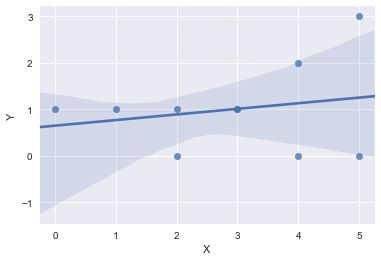

In [10]:
# import matplotlib.pyplot as plt
# import seaborn as sns
df2 = pd.DataFrame({'X':x, 'Y':y})
sns.regplot('X','Y', data = df2)

## 3. Data Input
### 3.1 Input from text files
#### method 1:
arr = np.loadtext('filename', delimiter = ',')  
pd.DataFrame(arr, columns = [...])  
#### method 2:
pd.read_csv('filename', header = YES/NONE, delimiter = ',', skipfooter = 3)
### 3.2 Input from excel
#### method 1:
xls = pd.ExcelFile('filename') -- sheet specific  
data = xls.parse('Sheet1', index_col = NONE, na_values = ['NA'])
#### method 2:
data = pd.read_excel('filename', 'Sheet1', index_col = NONE, na_values = ['NA']) -- file specific, need same sheets
## 4. Display of Statistical Data

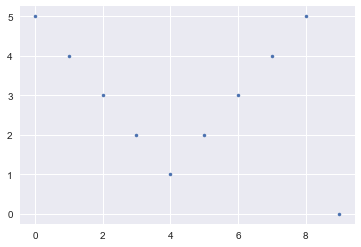

In [11]:
# scatter plot
plt.plot(x, '.')

(array([ 2.,  4.,  4.]),
 array([ 0.        ,  1.66666667,  3.33333333,  5.        ]),
 <a list of 3 Patch objects>)

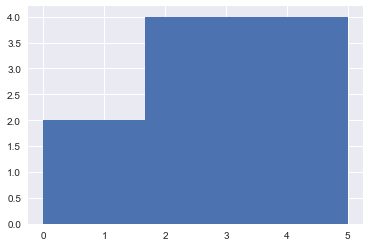

In [12]:
# histogram
plt.hist(x, bins = 3)

/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


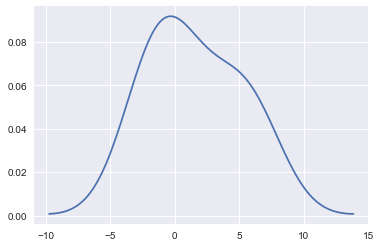

In [13]:
# kernel density estimation (KDE)
# %matplotlib inline
x2 = np.array([-2.1, -1.3, -0.4, 1.9, 5.1, 6.2])
sns.kdeplot(x2)

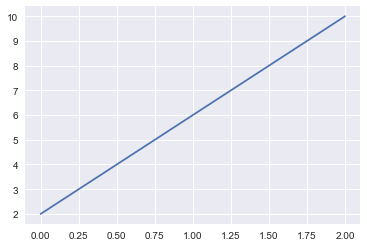

In [14]:
# cumulative freq
# import scipy.stats as stats
numbins = 3
plt.plot(stats.cumfreq(x, numbins)[0])

{'boxes': [<matplotlib.lines.Line2D at 0x1187c57f0>],
 'caps': [<matplotlib.lines.Line2D at 0x1187cfc18>,
 'fliers': [<matplotlib.lines.Line2D at 0x1188b1be0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1187d9cf8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1187c59e8>,
  <matplotlib.lines.Line2D at 0x1187cfa20>]}

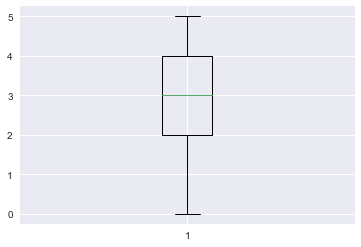

In [15]:
# box plot
plt.boxplot(x, sym='*')

/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:2342: UserWarning: The violinplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


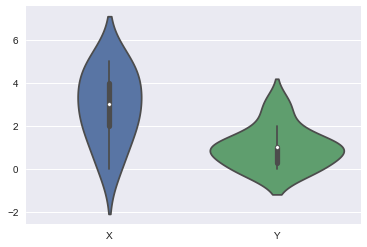

In [16]:
# violin plot
sns.violinplot(df2)

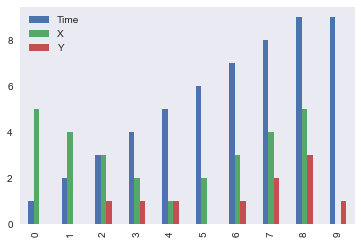

In [17]:
# grouped bar chart
df.plot(kind = 'bar', grid = False)

([<matplotlib.patches.Wedge at 0x118c359b0>,
  <matplotlib.text.Text at 0x118d48128>])

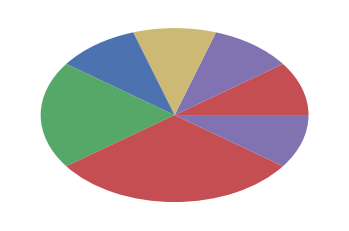

In [18]:
# pie chart
plt.pie(y)

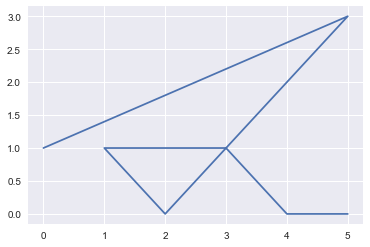

In [19]:
# scatter of 2 variables
plt.plot(x,y)

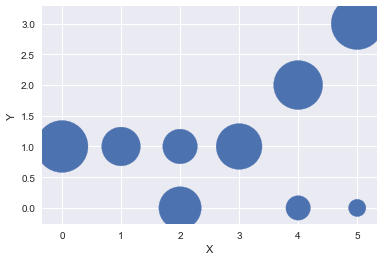

In [20]:
df.plot(kind = 'scatter', x='X', y='Y', s = df['Time']*300)

## 5. Distributions and Hypothesis Test: Background
### 5.1 populations and samples
|     | population parameter | sample statistics  
|-----|----------------------|---------  
|mean |         miu          |     x bar 
|SD   |        sita          |       S  
### 5.2 Probability Distributions
#### Discrete Distribution
(P1 + P2 + ... + Pn) = 1  
E[X] = xiPi(i = 1~n)
#### Continuous Distribution
E[X] = xf(x)dx
Var[X] = E[x2] - (E[X])2
### 5.3 Degree of Freedom
### 5.4 Study Design
hypothesis test  
screen investigation  
optimization problem  
statistical modeling
## 6. Distribution of one Variable
### 6.1 Characterizing a Distribution

In [21]:
# mean
x3 = np.arange(10)
np.mean(x3)

4.5

In [22]:
# deal with NA
x3withna = np.hstack((x3, np.nan))
print(np.mean(x3withna))
print(np.nanmean(x3withna))

nan
4.5


In [23]:
# median
np.median(x3)

4.5

In [24]:
# mode
x4 = [1,3,4,4,7]
stats.mode(x4)

ModeResult(mode=array([4]), count=array([2]))

In [25]:
# geometric mean
x5 = np.arange(1,101)
stats.gmean(x5)

37.992689344834304

In [26]:
# range
np.ptp(x3) # peak to peak

9

In [27]:
# variance and standard deviation
x6 = np.arange(7, 14)
np.std(x6, ddof = 0)

2.0

In [28]:
# use n-1
np.std(x6, ddof = 1)

2.1602468994692869

#### other statistics
percentile  
standard error (sample standard error of the mean, SE or SEM. estimate of the standard deviation of a coefficient)  
confidence interval (the reported range contains the true value for the parameter with a likelihood of a%)
#### discription of a distribution
location  
scale  
shape: skewness, kurtosis (peakedness)
#### presentations of probability density
PDF: probability density function  
CDF: cumulative density function  
SF: survival function, 1-CDF  
PPF: percential point function
ISF: inverse survival function  
RVS: random variate sample

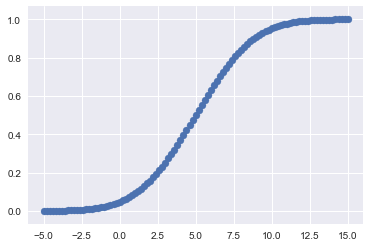

In [29]:
# from scipy import stats
myDF = stats.norm(5, 3) # mean = 5, SD = 3
x = np.linspace(-5, 15, 101)
y = myDF.cdf(x)
plt.scatter(x, y)

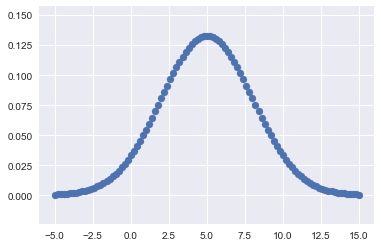

In [30]:
y2 = myDF.pdf(x)
plt.scatter(x, y2)

### 6.2 Discrete Distributions
#### Bernoulli distribution
P(head) + P(tail) = 1

In [31]:
p = 0.5
bern = stats.bernoulli(p)
p_tails = bern.pmf(0) # probability mass function
p_heads = bern.pmf(1)
trials = bern.rvs(10)
trials

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0])

#### Binomial distribution
if flip a coin n times, how often did heads come up?  
p0 + p1 + ... + pn-1 = 1

In [32]:
(p, num) = (0.5, 4)
bino = stats.binom(num, p)
bino.pmf(np.arange(5))

array([ 0.0625,  0.25  ,  0.375 ,  0.25  ,  0.0625])

#### Poisson Distribution
P(X=k) = (e_-lamda lamda_k)/k!
### 6.3 Normal distribution

In [33]:
mu = -2
sigma = 0.7
myDistribution = stats.norm(mu, sigma)
significanceLevel = 0.05
myDistribution.ppf([significanceLevel/2, 1-significanceLevel/2])

array([-3.37197479, -0.62802521])

#### sum of normal distributions
X -- N(miux, sitax_2)   
Y -- N(miuy, sitay_2)   
X+-Y -- N(miux+-miuy, sitax_2+sitay_2)
#### central limit theorem
sampling distribution of mean tends toward normality
#### hypothesis test

In [34]:
# the mean weight of healthy babies is 3.5, 
# the probability that a healthy baby is lighter or heavier 0.9 than the average is cdf(2.6)
nd = stats.norm(3.5, 0.76)
nd.cdf(2.6)

0.11816486815719918

### 6.4 Other continuous distributions
#### t-distribution
在重复抽样的情况下，样本的mean的分布属于T分布  
如果总体方差已知，且样本数量较大（>30），根据中央极限定理，样本mean是正态分布的，可以使用Z检验  
如果总体方差未知，样本数量小，应使用T检验  
T分布比Z分布矮胖一点--longer tail, less affected by extreme cases

In [35]:
n = 20
df = n-1
alpha = 0.05

print('T:', stats.t(df).isf(alpha/2))
print('Z:', stats.norm.isf(alpha/2))

T: 2.09302405441
Z: 1.95996398454


#### chi-square distribution
if X is normal distribution, then x_2 is chi-square distribution, with DOF=1  
the sum square of n independent and normal distribution variables is chi-square distribution with DOF=n  
k个独立的标准正态分布变量的平方和服从自由度为k的卡方分布

In [36]:
# 要求std不超过0.05，是否符合？
# 如果总体的std是0.05，chi-square value等于或大于样本观察到的值得可能性是19.29%
data = np.array([3.04, 2.94, 3.01, 3, 2.94, 2.91, 3.02, 3.04, 3.09, 2.95, 2.99, 3.1, 3.02])
sigma = 0.05
chi2Dist = stats.chi2(len(data)-1)
statistic = sum( ((data-np.mean(data))/sigma)**2 )
chi2Dist.sf(statistic)

0.19293306654285153

#### F-distribution
use in determining critical values in ANOVAs (analysis of variance)  
investigate whether 2 groups have the same variance

In [37]:
m1 = np.array([20.7, 20.3, 20.3, 20.3, 20.7, 19.9, 19.9, 19.9, 20.3, 20.3, 19.7, 20,3])
m2 = np.array([19.7, 19.4, 20.1, 18.6, 18.8, 20.2, 18.7, 19])

fval = np.var(m1, ddof=1)/np.var(m2, ddof=1)
fd = stats.f(len(m1)-1, len(m2)-1)
p_oneTail = fd.cdf(fval)

if p_oneTail<0.025 or p_oneTail>0.975:
    print('significant difference between the two distributions')
else:
    print('no significant difference')

significant difference between the two distributions


#### Lognormal distribution
taking log and then will be transformed to a normal distribution
#### Weibull distribution
using in survival analysis
#### Exponential distribution
#### Uniform distribution

## 7. Hypothesis Tests
### 7.1 Typical Procedure
#### Data screen and outliers
visually inspect the data  
deal with NAs  
find extreme samples and check them carefully -- more than 1.5 IQR or 2 STD from the sample mean  
determine the data type of the values  
#### Normality check
QQ-plot: plot quantiles against a reference distribution  
PP-plot: plot cdf against a reference distribution   
Probability-plot: plot ordered value against quantiles of a reference distribution

((array([-1.62649229, -1.1460438 , -0.83908498, -0.59616318, -0.38436112,
         -0.18866497,  0.        ,  0.18866497,  0.38436112,  0.59616318,
          0.83908498,  1.1460438 ,  1.62649229]),
  array([ 2.91,  2.94,  2.94,  2.95,  2.99,  3.  ,  3.01,  3.02,  3.02,
          3.04,  3.04,  3.09,  3.1 ])),
 (0.060923155107307427, 3.0038461538461543, 0.98365215235390802))

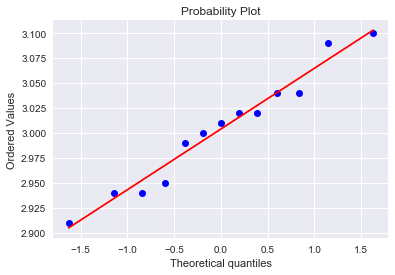

In [38]:
stats.probplot(data, plot=plt)

In [39]:
# using D-P omnibus test, which is a test based on descriptive statistics of the sample
# combine skewness and kurtosis test
# 如果p-val非常小，则意味着数据不太可能来自正态分布
stats.normaltest(data)

/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1327: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  "anyway, n=%i" % int(n))


NormaltestResult(statistic=0.21402567702286138, pvalue=0.89851413733223262)

#### Transformation
如果是long tail data，很可能可以通过log转换变成normal distribution
### 7.2 Hypothesis concept
* draw a random sample from the population (scores)
* form null hypo (mean = 110)
* calculate t-value
* compare observed t-value and the t-distribution, calculate p-value (likelihood that a value greater than observed value is found by chance)
* if p < 0.05, reject null hypo (significant difference), if p > 0.05, cannot reject null hypo. if p < 0.001, highly significant  
p < 0.05: if the null hypo is true, the chance to find a test statistics as extreme as or more extreme than the one observed is less than 5%

In [40]:
scores = np.array([109.4, 76.2, 128.7, 93.7, 85.6, 117.7, 117.2, 87.3, 100.3, 55.1])
tval = (110-np.mean(scores))/stats.sem(scores)
td = stats.t(len(scores)-1)
p = 2*td.sf(tval)
p

0.099538436527906227

#### calibrate p-value, exploratory research and comfirmatory research pp129
#### type I (false positive rate) and type II (false negative rate) error, test power (sensitivity)
#### ROC curve

## 8. Tests the Mean of Numerical Data
### 8.1 One sample t-test for a mean value

In [3]:
# T-test for a mean value: we have a population N(7, 3), 
# what is the chance we find a mean that 0.5 more or less than 7 (sample size 100)?
np.random.seed(12345)
normDist = stats.norm(loc=7, scale=3)
data = normDist.rvs(100)
checkVal = 6.5

# T-test: tProb就是检验的p value
t, tProb = stats.ttest_1samp(data, checkVal)

# Z-test
mmean = np.mean(data)
mstd = np.std(data, ddof=1)
normProb = stats.norm.cdf(checkVal, loc=mmean, scale=mstd/np.sqrt(len(data)))*2  # 计算p value

print(('The probability from the t-test is ' + 
       '{0:5.4f}, and from the normal distribution {1:5.4f}'.format(tProb, normProb)))

The probability from the t-test is 0.0571, and from the normal distribution 0.0542


In [5]:
# Wilcoxon signed rank sum test
rank, pVal = stats.wilcoxon(data-checkVal)
print(rank, pVal)

1976.0 0.059074250744


### 8.2 Comparison of two groups

In [13]:
# 8.2.1 paired T-test -- two values recorded for the same subject at different times and need to compare
np.random.seed(12345)
data = np.random.randn(10)+0.1
data1 = np.random.randn(10)*5
data2 = data1+data

# method 1
stats.ttest_1samp(data,0)

Ttest_1sampResult(statistic=2.2236647884935152, pvalue=0.053244608085120236)

In [14]:
# method 2
stats.ttest_rel(data1, data2)

Ttest_relResult(statistic=-2.2236647884935148, pvalue=0.053244608085120285)

In [15]:
# 8.2.2 T-test between independent groups, or unpaired T-test
stats.ttest_ind(data1, data2)

Ttest_indResult(statistic=-0.22102291852236164, pvalue=0.82756238625538336)

In [16]:
# 8.2.3 Nonparametric comparison of two groups: Mann-Whitney test -- 如果数据不是正态分布的
stats.mannwhitneyu(data1, data2)

MannwhitneyuResult(statistic=46.0, pvalue=0.39566839005033022)

In [25]:
# 8.2.4 Hypothesis test
np.random.seed(12345)
race1 = np.round(np.random.randn(20)*10+90)
race2 = np.round(np.random.randn(20)*10+85)

# t-test
t, pval = stats.ttest_rel(race1, race2)
print("the probability that the two distributions are equal is {0:5.4f}.".format(pval))

the probability that the two distributions are equal is 0.0082.


In [28]:
# statistic model: assume that race2 = race1 + b
import statsmodels.formula.api as sm
df = pd.DataFrame({'Race1': race1, 'Race2':race2})
result = sm.ols(formula='I(Race2-Race1)~1', data = df).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:       I(Race2 - Race1)   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                      -inf
Date:                Tue, 10 Apr 2018   Prob (F-statistic):                nan
Time:                        11:13:57   Log-Likelihood:                -82.907
No. Observations:                  20   AIC:                             167.8
Df Residuals:                      19   BIC:                             168.8
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    -10.3500      3.505     -2.953      0.0

/anaconda/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1191: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ess/self.df_model


### 8.3 Comparison of Multiple Groups

In [31]:
# 8.3.1 ANOVA
# one-way ANOVA
race3 = np.round(np.random.randn(20)*10+80)
stats.f_oneway(race1, race2, race3)

F_onewayResult(statistic=5.5932081495882526, pvalue=0.0060540250760612617)

In [32]:
# one-way ANOVA, detial method -- 这里还不是很明白，需要再看看, see ISP_anovaOneway.py
# from statsmodels.formula.api import ols
# from statsmodels.stats.anova import anova_lm
# df = pd.DataFrame(data, columns = ['value', 'treatment'])
# model = ols('value - C(treatment)', df).fit()
# anovaresults = anova_lm(model)
# print(anovaresults)

In [33]:
# 8.3.2 Multiple comparisons -- 这里还不是很明白，需要再看看
# Tukey test -- see ISP_multipleTesting.py
# Bonferroni correction
from statsmodels.sandbox.stats.multicomp import multipletests
multipletests([0.05, 0.3, 0.01], method = 'bonferroni')
# Holm correction

(array([False, False,  True], dtype=bool),
 array([ 0.15,  0.9 ,  0.03]),
 0.016952427508441503,
 0.016666666666666666)

#### 8.3.3 Kruskal-Walli test -- see ISP_kruskalWallis.py
#### 8.3.4 Two-way ANOVA -- see ISP_anovaTwoway.py
#### 8.3.5 Three-way ANOVA

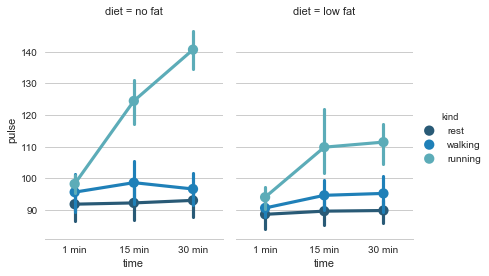

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'whitegrid')

df = sns.load_dataset('exercise')

sns.factorplot('time', 'pulse', hue = 'kind', col = 'diet', data = df, hue_order = ['rest','walking','running'], 
              palette = 'YlGnBu_d', aspect = 0.75).despine(left=True)
plt.show()

### 8.4 Summary -- see pp155-156

# 9. Tests on Categorical Data -- pp159
# 10. Analysis of Survival Times -- pp175

# 11. Linear Regression Models
useful packages: statsmodel, PyMC, scikit-learn, scikit.bootstrap  
linear regression models: y = kx + b  